In [98]:
import mxnet as mx

In [99]:
inputdata = mx.sym.Variable("input")

In [100]:
def conv_layer(data_in, filter_size, pooling_size, is_conv,is_pooling):
    """
    :return: a single convolution layer symbol
    """
    #input layer
    layer = data_in
    if is_conv:
        input_layer = mx.sym.Convolution(data = layer, 
                                kernel = (filter_size, filter_size), 
                                num_filter = 64,
                                pad = (1, 1),
                                stride = (1, 1)
                                )
    
        #batchnorm
        batch_layer = mx.sym.BatchNorm(input_layer)
    
        #Activation layer
        layer = mx.sym.Activation(batch_layer,
                              act_type='relu',
                              )
    #pooling layer
    if is_pooling: 
        layer = mx.sym.Pooling(layer, 
                               kernel=(pooling_size,pooling_size),
                               pool_type='max'
                                   )
    
    return layer

In [101]:
output = conv_layer(inputdata, 3, 2,True,True)

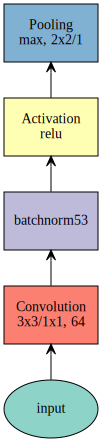

In [102]:
mx.viz.plot_network(output)

In [103]:
def get_conv_sym(n_layer, inputdata):

    """
    :return: symbol of a convolutional neural network
    """
    data_f = mx.sym.flatten(data=inputdata)
    
    layer = conv_layer(data_f,3,2,True,True)
    for i in range(n_layer - 1):
        layer = conv_layer(layer,3,2,True,True)
    layer = mx.sym.Flatten(layer)
    l = mx.sym.FullyConnected(layer,num_hidden = 10)
    return l

In [104]:
sym = get_conv_sym(5, inputdata)

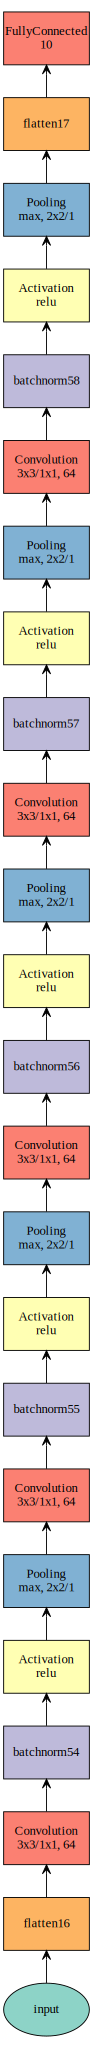

In [105]:
mx.viz.plot_network(sym)

In [106]:
def inception_layer(inputdata):
    
    l1 = conv_layer(inputdata, 1, 1, True, False)
    l21 = conv_layer(inputdata, 1, 1, True, False)
    l2 = conv_layer(l21, 3, 2, True, False)
    l31 = conv_layer(inputdata, 1, 1, True, False)
    l3 = conv_layer(l31, 5, 2, True, False)
    l41 = conv_layer(inputdata, 1, 3, False, True)
    l4 = conv_layer(l41, 1, 1, True, False)
    l = mx.sym.Concat(l1,l2,l3,l4)
    return l

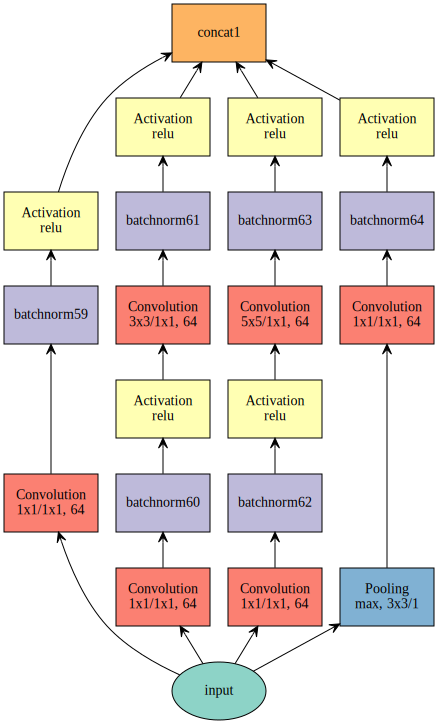

In [107]:
inception = inception_layer(inputdata)
mx.viz.plot_network(inception)